In [4]:
import numpy as np
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data = pd.read_csv(r'/content/drive/MyDrive/DS4A Project/all_transactions.csv')
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['disclosure_date'] = pd.to_datetime(data['disclosure_date'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f690d07b790>,
      dtype=object)

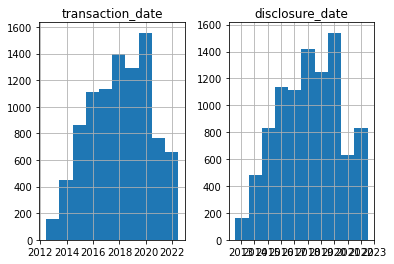

In [38]:
data.hist()

# New Section

In [22]:
data.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
0,2022-06-21,Spouse,--,"Broadcom Corp <div class=""text-muted""><em>Rate...",Corporate Bond,Purchase,"$15,001 - $50,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,2022-07-05
1,2022-06-15,Spouse,--,"Office Properties Income Trust <div class=""tex...",Corporate Bond,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/a...,2022-07-05
2,2022-05-17,Spouse,--,Lee County Florida Health Care Facilities Reve...,Municipal Security,Purchase,"$500,001 - $1,000,000",--,Rick Scott,https://efdsearch.senate.gov/search/view/ptr/8...,2022-06-16
3,2022-06-03,Spouse,WFC,Wells Fargo &amp; Company Common Stock,Stock,Purchase,"$1,001 - $15,000",Dividend Reinvestment,"A. Mitchell Mcconnell, Jr.",https://efdsearch.senate.gov/search/view/ptr/5...,2022-06-13
4,2022-05-31,Joint,X,United States Steel Corporation Common Stock <...,Stock Option,Sale (Partial),"$15,001 - $50,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/4...,2022-06-13


In [23]:
data.columns

Index(['transaction_date', 'owner', 'ticker', 'asset_description',
       'asset_type', 'type', 'amount', 'comment', 'senator', 'ptr_link',
       'disclosure_date'],
      dtype='object')

In [24]:
data['owner'].value_counts()

Joint     3748
Spouse    3566
Self      1431
Child      188
Name: owner, dtype: int64

In [25]:
data['asset_type'].value_counts()

Stock                           6756
PDF Disclosed Filing             465
Other Securities                 454
Municipal Security               407
Stock Option                     253
Corporate Bond                   246
Non-Public Stock                 100
Commodities/Futures Contract      48
Cryptocurrency                     3
Name: asset_type, dtype: int64

In [26]:
data['type'].value_counts()

Purchase          4580
Sale (Full)       2399
Sale (Partial)    1853
Exchange           101
Name: type, dtype: int64

In [27]:
data['amount'].value_counts()

$1,001 - $15,000             6084
$15,001 - $50,000            1664
$50,001 - $100,000            551
Unknown                       465
$100,001 - $250,000           335
$250,001 - $500,000           138
$500,001 - $1,000,000         111
$1,000,001 - $5,000,000        35
$5,000,001 - $25,000,000       12
$25,000,001 - $50,000,000       2
Over $50,000,000                1
Name: amount, dtype: int64

In [28]:
stock = data[data['asset_type']=='Stock'].loc[:, ['transaction_date', 'owner', 'ticker', 'type', 'amount', 'senator']]
stock = stock[stock['transaction_date'] >= np.datetime64('2017-01-01')]
stock = stock[stock['transaction_date'] <= np.datetime64('2022-07-01')]
stock = stock[stock['ticker'] != '--']
stock = stock[stock['amount'] != 'Unknown']
stock['amount'] = stock['amount'].apply(lambda i: int(i.split(' ')[0][1:].replace(',', ''))-1)

In [29]:
stock

,transaction_date,owner,ticker,type,amount,senator
3,2022-06-03,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
6,2022-05-31,Joint,X,Purchase,100000,Thomas H Tuberville
7,2022-05-20,Joint,PYPL,Purchase,50000,Thomas H Tuberville
8,2022-05-19,Joint,PYPL,Purchase,250000,Thomas H Tuberville
17,2022-05-16,Spouse,JCI,Sale (Full),1000,Thomas R Carper
...,...,...,...,...,...,...
6309,2017-01-20,Self,KO,Purchase,100000,John Hoeven
6310,2017-01-20,Self,CSCO,Purchase,100000,John Hoeven
6311,2017-01-20,Self,T,Purchase,50000,John Hoeven
6339,2017-01-04,Self,SPG,Purchase,100000,John Hoeven


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f690af9d490>,
      dtype=object)

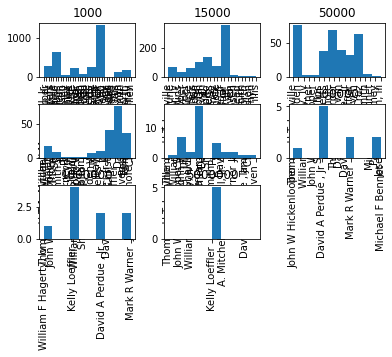

In [47]:
stock.hist(column='senator', by='amount')

In [30]:
stock.sort_values(by=['senator', 'ticker', 'transaction_date']).head(50)

,transaction_date,owner,ticker,type,amount,senator
3071,2019-06-03,Spouse,IR,Sale (Full),250000,"A. Mitchell Mcconnell, Jr."
3070,2019-06-03,Spouse,VMC,Sale (Full),250000,"A. Mitchell Mcconnell, Jr."
4458,2017-09-07,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
4457,2017-12-05,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
4456,2018-03-05,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
4349,2018-06-01,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
4099,2018-09-06,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
3770,2018-12-05,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
3460,2019-03-05,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."
3058,2019-06-01,Spouse,WFC,Purchase,1000,"A. Mitchell Mcconnell, Jr."


In [32]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [33]:
import yfinance as yf
ticker = stock['ticker'].unique().tolist()
data = yf.download(ticker, start='2016-12-30', end='2022-07-01')['Adj Close']
valid_ticker = list(set(ticker)-set(data.columns.tolist()))

[*********************100%***********************]  760 of 760 completed

80 Failed downloads:
- BCR: No data found for this date range, symbol may be delisted
- NPSND: No data found for this date range, symbol may be delisted
- ZNGA.SW: No data found, symbol may be delisted
- HRS: No data found, symbol may be delisted
- TCP: No data found, symbol may be delisted
- ZIOP: No data found, symbol may be delisted
- KL: No data found, symbol may be delisted
- MSTY.PA: No data found, symbol may be delisted
- VSM: No data found, symbol may be delisted
- FDC: No data found, symbol may be delisted
- LMRK: No data found, symbol may be delisted
- LB: No data found, symbol may be delisted
- TCF: No data found, symbol may be delisted
- RTN: No data found, symbol may be delisted
- XLNX: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- TOT: No data found, symbol may be delisted
- DD-PA: No data found, symbol may be delisted
- AGN: No data found, symbol may be deli

In [35]:
data.to_csv('stock_price1.csv')